# Plotting NEMO data with Multidimensional Coordinates breaks with ValueError #4293
https://github.com/pydata/xarray/issues/4293

conda env: `phd_v3`

In [8]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
print(xr.__version__)

0.16.0


In [14]:
T = xr.open_dataset('ORCA025-test.nc').thetao.isel(deptht=0, time_counter=0)
T

<xarray.DataArray 'thetao' (y: 1021, x: 1442)>
[1472282 values with dtype=float32]
Coordinates:
    deptht         float32 0.50576
    nav_lat        (y, x) float32 ...
    nav_lon        (y, x) float32 ...
    time_centered  datetime64[ns] ...
    time_counter   datetime64[ns] 2013-01-02T12:00:00
Dimensions without coordinates: y, x
Attributes:
    long_name:           sea_water_potential_temperature
    units:               degC
    online_operation:    average
    interval_operation:  1440 s
    interval_write:      5 d
    cell_methods:        time: mean (interval: 1440 s)

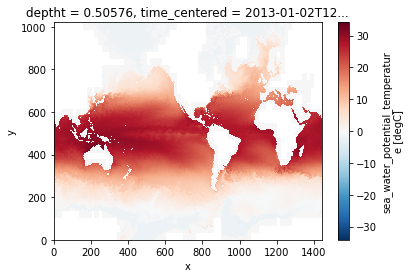

In [15]:
T.plot()

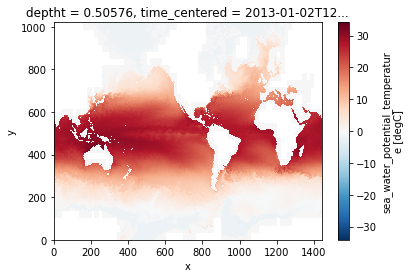

In [16]:
T.plot.pcolormesh()

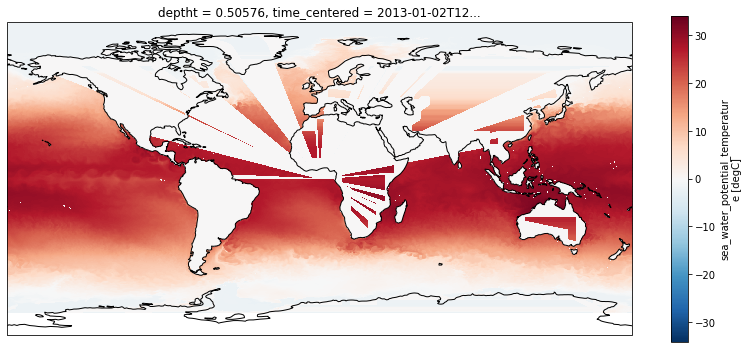

In [18]:
plt.figure(figsize=(14,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
T.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), x='nav_lon', y='nav_lat')
ax.coastlines()

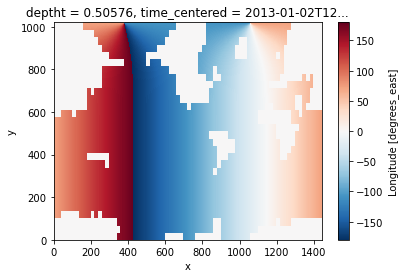

In [19]:
T.nav_lon.plot()

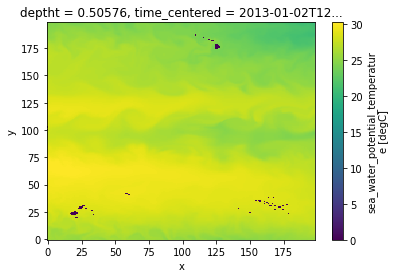

In [20]:
T.where( (T.x > 400) & (T.x < 600) & (T.y > 400) & (T.y < 600), drop=True).plot()

In [21]:
T_subarea = T.where( (T.x > 400) & (T.x < 600) & (T.y > 400) & (T.y < 600), drop=True)
T_subarea

<xarray.DataArray 'thetao' (y: 199, x: 199)>
array([[26.053343, 25.970469, 25.945505, ..., 25.766   , 25.710144,
        25.663881],
       [26.186874, 26.12085 , 26.07333 , ..., 25.883371, 25.824076,
        25.794277],
       [26.260286, 26.214058, 26.15961 , ..., 26.041569, 26.000376,
        25.984062],
       ...,
       [25.03942 , 24.784472, 24.717705, ..., 21.205   , 21.074907,
        20.901726],
       [24.853065, 24.688444, 24.703459, ..., 21.054302, 20.896408,
        20.712696],
       [24.666216, 24.643293, 24.716238, ..., 20.862696, 20.702263,
        20.523306]], dtype=float32)
Coordinates:
    deptht         float32 0.50576
    nav_lat        (y, x) float32 -23.556826 -23.556826 ... 24.463459 24.463406
    nav_lon        (y, x) float32 173.0 173.25 173.5 ... -137.74973 -137.49973
    time_centered  datetime64[ns] 2013-01-02T12:00:00
    time_counter   datetime64[ns] 2013-01-02T12:00:00
Dimensions without coordinates: y, x
Attributes:
    long_name:           sea_water_potential_temperature
    units:               degC
    online_operation:    average
    interval_operation:  1440 s
    interval_write:      5 d
    cell_methods:        time: mean (interval: 1440 s)

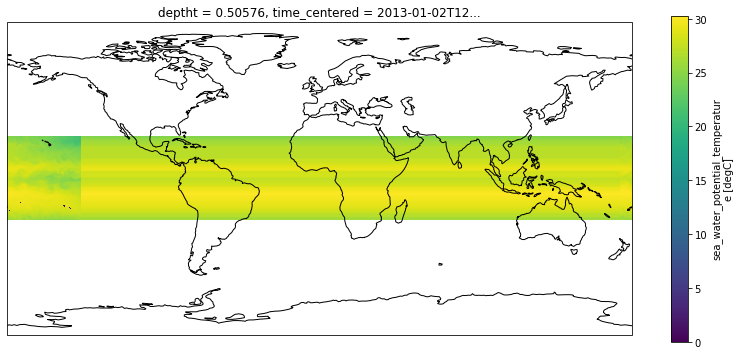

In [22]:
plt.figure(figsize=(14,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
T_subarea.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), x='nav_lon', y='nav_lat')
ax.coastlines()